# 4.2 Multiclass classification

## 4.2.1

- reuters dataset, each data is a list of **word indices**
- each label is a label/topic index
- the train and test data can be decoded with `get_word_index()` method of the data loader
- `padding`, `start of seq`, and `unknown`

In [79]:
from keras.datasets import reuters
# we restrict the words to 10,000 most frequent words
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10_000)

print(f"num of training examples:{len(train_data)}")

# get word indices
word_index = reuters.get_word_index()
reverse_word_index = dict([(val, key) for (key, val) in word_index.items()])

# offset by 3 because the 0, 1, 2 are reserved for padding, start of seq, and unknown
" ".join([reverse_word_index.get(i - 3, "?") for i in train_data[100]])

num of training examples:8982


"? opec believes world oil prices should be set around a fixed average price of 18 dlrs a barrel ? assistant general secretary ? al wattari said today in a speech to a european community ec ? opec seminar in luxembourg released here al wattari said opec believes the world energy trade should be kept without restrictions and should be built around a fixed average price of 18 dlrs but he warned that defense of the 18 dlr a barrel level had caused hardship for opec countries who had been forced to curtail production and he warned that such cutbacks by opec states could not be sustained in some cases for opec to stabilize the world oil price at what is now considered the optimal level of 18 dlrs a barrel its member countries have had to undergo severe hardship in ? production al wattari said such cutbacks cannot in certain cases be sustained al wattari said as well as financial and marketing pressures some states depended on associated gas output for domestic use and oil cutbacks had left 

## 4.2.2 data prep

- to vectorize train and test data: **multi-hot encode**
- to vectorize labels or topics: **one-hot encoding** / categorical encoding, or just use integer tensor with `sparse_categorical_crossentropy`

In [80]:
# multi-hot encode
import numpy as np
from keras.utils import to_categorical

def vectorize_sequences(sequences, dimension=10_000):
    results = np.zeros((len(sequences), dimension))
    for i, seq in enumerate(sequences):
        for j in seq:
            results[i, j] = 1
    return results

x_train, x_test = vectorize_sequences(train_data), vectorize_sequences(test_data)
print("[data] multi-hot encoded tensors:")
print(x_train[0], "len: %s" % len(x_train[0]))

y_train, y_test = to_categorical(train_labels), to_categorical(test_labels)

print("[label] one-hot encoded tensors:")
print(y_train[0], "len: %s" % len(y_train[0]))

[data] multi-hot encoded tensors:
[0. 1. 1. ... 0. 0. 0.] len: 10000
[label] one-hot encoded tensors:
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] len: 46


## 4.2.3 building your model

- for 46 classes, 16-dimensional intermediate layers may be too limited
- activation: output = relu(dot(input, W) + b)
- `softmax`: probability distribution over 46 output classes
- `rmsprop`: Root Mean Square Propagation (adaptive learning rate algo)
- `categorical_crossentropy`: information theory

In [81]:
import keras
from keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

model.compile(optimizer="rmsprop", 
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 4.2.4: validating

- select first 1_000 samples as validation set

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3911 - loss: 3.2851 - val_accuracy: 0.6260 - val_loss: 1.8289
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6689 - loss: 1.6199 - val_accuracy: 0.7150 - val_loss: 1.3496
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7535 - loss: 1.1686 - val_accuracy: 0.7330 - val_loss: 1.1889
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7965 - loss: 0.9731 - val_accuracy: 0.7720 - val_loss: 1.0805
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8331 - loss: 0.7952 - val_accuracy: 0.7960 - val_loss: 0.9851
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8634 - loss: 0.6421 - val_accuracy: 0.8140 - val_loss: 0.9416
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8876 - loss: 0.5432 - val_accuracy: 0.8000 - val_loss: 0.9155
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8995 - loss: 0.4551 - val_accuracy: 0.7950 - val_loss

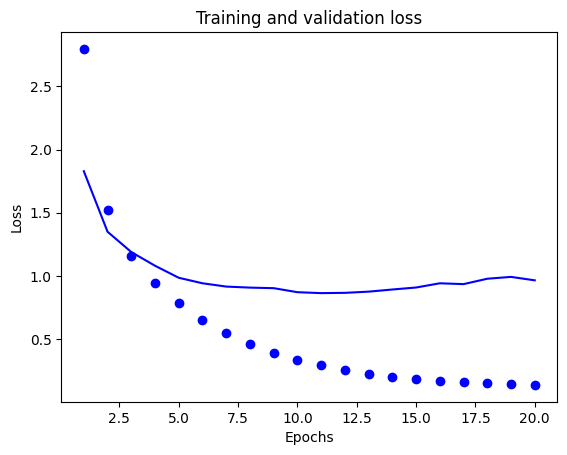

In [82]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

import matplotlib.pyplot as plt 

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

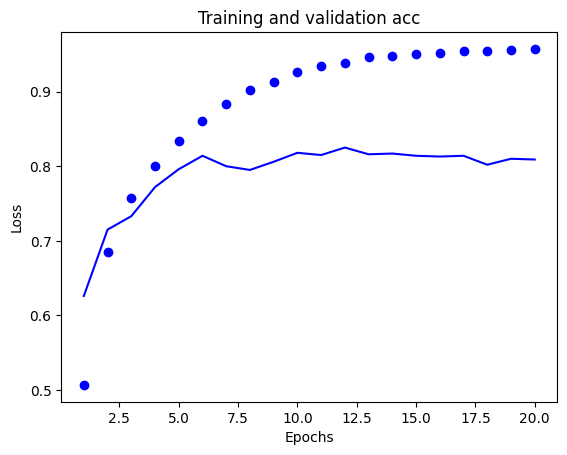

In [83]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [86]:
result = model.evaluate(x_test, y_test)
print(result)

import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.7966 - loss: 1.0149
[1.034082293510437, 0.7894033789634705]


0.1856634016028495

## 4.2.5 Generating predictions

In [90]:
predictions = model.predict(x_test)
print(predictions[0].shape, np.sum(predictions[0]), np.argmax(predictions[0]))

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
(46,) 0.9999999 3
